In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from tensorflow import keras

In [2]:
train_dir = "../train"
test_dir = "../test"

print(train_dir)
print(test_dir)


../train
../test


In [3]:
# Carregue os datasets
img_size = (64, 64)  # Tamanho desejado (ex: 224x224 para Transfer Learning)
batch_size = 32        # Pode ajustar conforme sua GPU

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True,       # Embaralha os dados
    seed=42             # Para reprodutibilidade
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False       # Não precisa embaralhar o teste
)

Found 34714 files belonging to 21 classes.
Found 11548 files belonging to 21 classes.


In [4]:
# Número de classes (letras)
class_names = train_ds.class_names
print("Classes (letras) encontradas:", class_names)

# Formato de um batch de imagens
for images, labels in train_ds.take(1):  # Pega o primeiro batch
    print("\nFormato das imagens:", images.shape)  # (batch_size, 224, 224, 3)
    print("Formato de UMA imagem:", images[0].shape)  # (224, 224, 3)
    print("Rótulos do batch:", labels.numpy())  # Ex: [0, 2, 1, ...] (índices das classes)

Classes (letras) encontradas: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'I', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'Y']

Formato das imagens: (32, 64, 64, 3)
Formato de UMA imagem: (64, 64, 3)
Rótulos do batch: [ 7 13  6 19 18 13  1  6  3 15  1 18  9  4  1 11  9 17  5  0 12  4 10 19
 13  4 17  1  3 18  1  5]


In [ ]:
print("GPUs disponíveis:", tf.config.list_physical_devices('GPU'))

In [5]:
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

In [6]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_ds, validation_data=test_ds, epochs=10)

Epoch 1/10


c:\Users\Aluno Tarde\Documents\test_arduino\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1085/1085 ━━━━━━━━━━━━━━━━━━━━ 96s 88ms/step - accuracy: 0.6623 - loss: 1.3781 - val_accuracy: 0.7966 - val_loss: 0.7452
Epoch 2/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.9444 - loss: 0.2323 - val_accuracy: 0.8296 - val_loss: 0.6437
Epoch 3/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.9802 - loss: 0.0955 - val_accuracy: 0.8396 - val_loss: 0.6264
Epoch 4/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.9905 - loss: 0.0448 - val_accuracy: 0.8367 - val_loss: 0.6360
Epoch 5/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.9966 - loss: 0.0218 - val_accuracy: 0.8272 - val_loss: 0.7304
Epoch 6/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 34s 31ms/step - accuracy: 0.9988 - loss: 0.0115 - val_accuracy: 0.8485 - val_loss: 0.6956
Epoch 7/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.9988 - loss: 0.0080 - val_accuracy: 0.8573 - val_loss: 0.7226
Epoch 8/10
1085/1085 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - accuracy: 0.9981 - loss: 0.00

In [7]:
# Avaliação no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_ds)

print(f"Acurácia no teste: {test_accuracy:.2%}")
print(f"Perda no teste: {test_loss:.4f}")

361/361 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8507 - loss: 0.9027
Acurácia no teste: 83.80%
Perda no teste: 0.9061


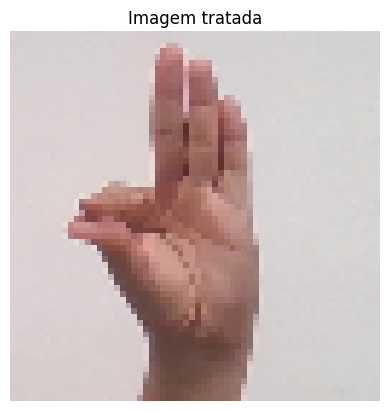

In [27]:
#etapa 10 -  TREINAMENTO DE IMAGEM EXTERNA

from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np

#caminho das imagens
caminho = '12.png'

#abrir imagem com PIL
img = Image.open(caminho)# L = grayscale

#redimensiona opara 28x28 pixls (formato do dataset Fashion MNIST)
img = img.resize((64,64))

#converter para array numpy e normalizar
img_array = np.array(img) / 255.0  #nomalizar par 0-1(preto ou branco)

#oprcional -  inverte cores se o fundo para escuro se a peça for clara
# img_array = 1 - img_array

#adiciona a dimensao de lote (batch_size=1)
img_array = img_array.reshape(1,64,64,3) #em 1 dimensao no formato 28x28

import matplotlib.pyplot as plt
plt.imshow(img_array[0], cmap='gray')
plt.title('Imagem tratada')
plt.axis('off')
plt.show()

#se o modelo for treinado com o fundo escuro precisa converter as imagens do mesmo jeito

In [28]:
#previsao da classe
predicao = model.predict(img_array)

#idetificando o indice da classe cm maior probabilidade
indice_classe = np.argmax(predicao)

print(f'Classe prevista: {class_names[indice_classe]}')
print(f'Confirança: {predicao[0][indice_classe]*100:.2f}%')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Classe prevista: F
Confirança: 100.00%


In [29]:
model.save("modelo_libras2.h5")